# Approximating a exponentially decacying noisy sine function

In [64]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import seed, random
%matplotlib inline

In [88]:
np.random.seed(1337)  # for reproducibility

# Simulate data
n = 3000
noise = 0.01 # standard deviation from 0

a = np.sin(np.arange(n) * 2 * np.pi / 40) * np.exp(-0.001 * np.arange(n))
a_noisy = a + np.random.normal(0, noise, n)
pdata = pd.DataFrame({"a_noisy":a_noisy})
data = pdata

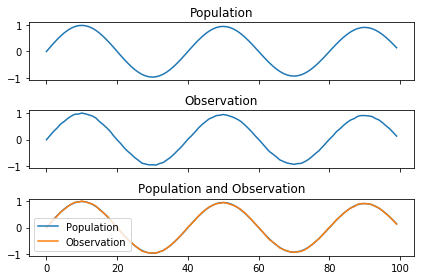

In [89]:
# visualize data
n_plot = 100

_, axarr = plt.subplots(3, sharex=True, sharey=True)
axarr[0].plot(a[:n_plot])
axarr[0].set_title('Population')
axarr[1].plot(a_noisy[:n_plot])
axarr[1].set_title('Observation')
axarr[2].plot(a[:n_plot], label="Population")
axarr[2].plot(a_noisy[:n_plot], label="Observation")
axarr[2].set_title('Population and Observation')
axarr[2].legend()
plt.tight_layout()
plt.show()

In [90]:
def _load_data(data, n_prev = 100):
    """
    data should be pd.DataFrame()
    """
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.2):  
    """
    This just splits data to training and testing parts
    """
    ntrn = int(round(len(df) * (1 - test_size)))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

# retrieve data
(X_train, y_train), (X_test, y_test) = train_test_split(data)

In [91]:
print(X_train.shape)

(2300, 100, 1)


In [ ]:
# define model structure
in_out_neurons = 1
hidden_neurons = 300
model = Sequential()
model.add(LSTM(units=300, input_shape=(None, 1), return_sequences=False))
model.add(Dense(units=1, activation="linear"))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
# and now train the model
# batch_size should be appropriate to your memory size
# number of epochs should be higher for real world problems
model.fit(X_train, y_train, batch_size=50, epochs=10, validation_split=0.05)

Train on 2185 samples, validate on 115 samples
Epoch 1/10
2185/2185 [==============================] - 7s 3ms/step - loss: 0.0097 - val_loss: 1.4130e-04
Epoch 2/10
2185/2185 [==============================] - 6s 3ms/step - loss: 1.8441e-04 - val_loss: 1.2337e-04
Epoch 3/10
2185/2185 [==============================] - 6s 3ms/step - loss: 1.4445e-04 - val_loss: 1.2054e-04
Epoch 4/10
2185/2185 [==============================] - 6s 3ms/step - loss: 1.4517e-04 - val_loss: 1.2114e-04
Epoch 5/10
2185/2185 [==============================] - 6s 3ms/step - loss: 1.3969e-04 - val_loss: 1.2537e-04
Epoch 6/10
2185/2185 [==============================] - 6s 3ms/step - loss: 1.4682e-04 - val_loss: 1.1870e-04
Epoch 7/10
2185/2185 [==============================] - 6s 3ms/step - loss: 1.4984e-04 - val_loss: 1.1634e-04
Epoch 8/10
2185/2185 [==============================] - 6s 3ms/step - loss: 1.5038e-04 - val_loss: 1.2321e-04
Epoch 9/10
 700/2185 [========>.....................] - ETA: 4s - loss: 1.444

In [ ]:
# evaluate model fit
score = model.evaluate(X_test, y_test)
print('Test score:', score)

In [ ]:
# visualize predictions
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_test[:], label='data')
plt.plot(test_prediction[:], label='pred')
plt.title('Test Observation and Prediction')
plt.legend()